# Jupyter book
There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [1]:
from rpy2.robjects import r, pandas2ri

In [2]:
pandas2ri.activate()

In [3]:
r.data('iris')

'iris'


In [4]:
r['iris'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [30]:
import statsmodels.datasets as sd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
data = sd.longley.load_pandas()

In [25]:
%load_ext rpy2.ipython

In [32]:
data.endog_name, data.exog_name

('TOTEMP', ['GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'])

In [33]:
y, x = data.endog, data.exog

In [38]:
x['TOTEMP'] = y

In [39]:
x

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0
5,98.1,346999.0,1932.0,3594.0,113270.0,1952.0,63639.0
6,99.0,365385.0,1870.0,3547.0,115094.0,1953.0,64989.0
7,100.0,363112.0,3578.0,3350.0,116219.0,1954.0,63761.0
8,101.2,397469.0,2904.0,3048.0,117388.0,1955.0,66019.0
9,104.6,419180.0,2822.0,2857.0,118734.0,1956.0,67857.0


In [40]:
gnp = x['GNP']
totemp = x['TOTEMP']


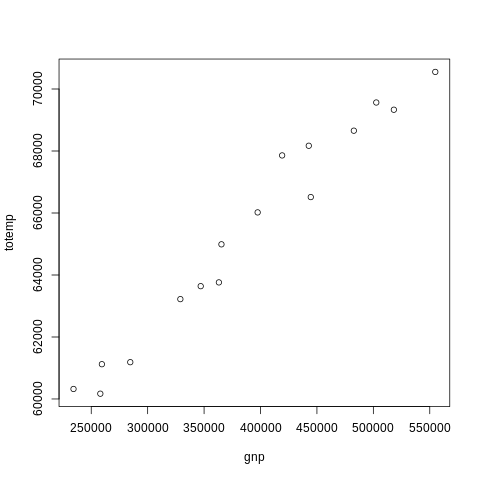

In [41]:
%R -i totemp,gnp plot(gnp, totemp)

In [45]:
%%R
# Least-squares regression
fit <- lm(totemp ~ gnp)
# Display the coefficients of the fit.


(Intercept)          gnp 
5.184359e+04 3.475229e-02 


 (Intercept)          gnp 
5.184359e+04 3.475229e-02 


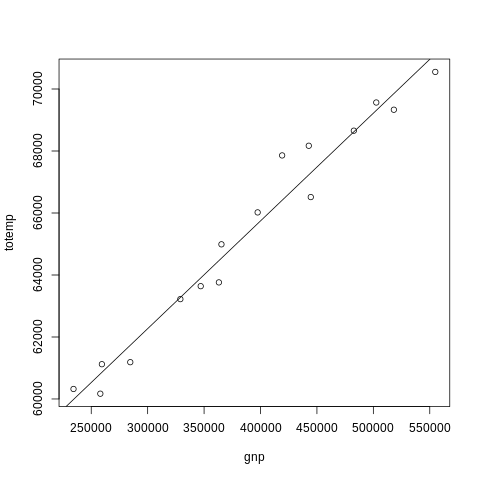

In [51]:
%%R
print(fit$coefficients)
# Plot the data points.
plot(gnp, totemp)
# And plot the linear regression.
abline(fit)


In [55]:
%%R
class(fit$coefficients)
class(fit$coefficients)

[1] "numeric"
